# Project: Amazon Electronics Products Sales

This notebook demonstrates a comprehensive sales analysis of an Amazon electronics products dataset with dimensions 1.3M x 10. The solution is implemented in `Python`, leveraging `Pandas` for data manipulation and `Matplotlib` for visualization.

The analysis aims to address the following questions:
1. What are the categories of electronic products?
2. Find the Top-10 users that bought the most in each category.
3. Analyze sales in a certain year, grouped by categories.
4. Given a brand, identify the categories in which it has products.
5. Determine the categories with the highest market competition.

## **Approach**

A logical and systematic approach is followed throughout the analysis, with each step accompanied by insights into the dataset. Key observations include:
- **Timestamp Accuracy:** Inconsistencies between the `timestamp` and `year` columns are observed, and thus decided to use the `timestamp` as the time reference for each purchase.
- **Data Completeness:** A significant proportion of rows (97%) contain NaN values in either the `brand` or `user_attr` columns, leading to the exclusion of these columns from some analyses due to their limited utility.

## **Dataset Details**

The dataset encompasses Amazon electronics sales data spanning from 1999 to 2018. It is available on [Kaggle](https://www.kaggle.com/datasets/edusanketdk/electronics/data).

## **Gained Insights**

1. **Categories of Electronic Products:**
        Identified the unique categories of products available in the dataset.

2. **Top-10 Users per Category:**
        Determined the top 10 users who purchased the most in each category.

3. **Yearly Sales Grouped by Categories:**
        Analyzed and visualized sales data for specific years, grouped by product categories.

4. **Brand-wise Product Categories:**
        For each brand, identified the categories in which its products are listed.

5. **Market Competition Analysis:**
        Determined which categories have the highest market competition based on the number of unique brands.

## Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Direct input 
#plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}"]
#Options
params = {'text.usetex' : True,
          'font.size' : 12,
          'font.family' : 'lmodern',
          }
plt.rcParams.update(params) 

In [2]:
df = pd.read_csv('./electronics.csv')

In [3]:
df

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,NaN,1999,NaN,0
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,NaN,1999,NaN,0
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,NaN,1999,NaN,0
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,NaN,1999,NaN,0
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,NaN,1999,NaN,0
...,...,...,...,...,...,...,...,...,...,...
1292949,9478,1157628,1.0,2018-09-26,Female,Headphones,Etre Jeune,2017,NaN,0
1292950,9435,1157629,5.0,2018-09-26,Female,Computers & Accessories,NaN,2017,NaN,0
1292951,9305,1157630,3.0,2018-09-26,Female,Computers & Accessories,NaN,2016,NaN,0
1292952,9303,1157631,5.0,2018-09-29,Male,Headphones,NaN,2018,NaN,0


## Dealing with Nans

In [4]:
# Define a predicate
def is_brand_or_user_attr_nan(brand, user_attr):
    return pd.isna(brand) or pd.isna(user_attr)

In [5]:
# No of rows with Nans in brand OR user_attr
nan_rows = df[df[['brand', 'user_attr']].apply(lambda x: is_brand_or_user_attr_nan(*x), axis = 1)]

In [6]:
nan_rows

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,NaN,1999,NaN,0
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,NaN,1999,NaN,0
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,NaN,1999,NaN,0
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,NaN,1999,NaN,0
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,NaN,1999,NaN,0
...,...,...,...,...,...,...,...,...,...,...
1292948,9217,1157627,5.0,2018-09-25,Male,Headphones,NaN,2016,NaN,0
1292949,9478,1157628,1.0,2018-09-26,Female,Headphones,Etre Jeune,2017,NaN,0
1292950,9435,1157629,5.0,2018-09-26,Female,Computers & Accessories,NaN,2017,NaN,0
1292951,9305,1157630,3.0,2018-09-26,Female,Computers & Accessories,NaN,2016,NaN,0


In [7]:
len(nan_rows) / len(df) * 100

96.50675894115336

In [8]:
# user_attr is Nan

def is_user_attr_nan(user_attr):
    return pd.isna(user_attr)

def is_brand_nan(brand):
    return pd.isna(brand)

In [9]:
nan_user_attr = df[df['user_attr'].apply(is_user_attr_nan)]

In [10]:
nan_user_attr

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,NaN,1999,NaN,0
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,NaN,1999,NaN,0
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,NaN,1999,NaN,0
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,NaN,1999,NaN,0
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,NaN,1999,NaN,0
...,...,...,...,...,...,...,...,...,...,...
1292948,9217,1157627,5.0,2018-09-25,Male,Headphones,NaN,2016,NaN,0
1292949,9478,1157628,1.0,2018-09-26,Female,Headphones,Etre Jeune,2017,NaN,0
1292950,9435,1157629,5.0,2018-09-26,Female,Computers & Accessories,NaN,2017,NaN,0
1292951,9305,1157630,3.0,2018-09-26,Female,Computers & Accessories,NaN,2016,NaN,0


In [11]:
len(nan_user_attr) / len(df) * 100

86.53285422373882

In [12]:
nan_brand = df[df['brand'].apply(is_user_attr_nan)]

In [13]:
nan_brand

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,NaN,1999,NaN,0
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,NaN,1999,NaN,0
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,NaN,1999,NaN,0
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,NaN,1999,NaN,0
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,NaN,1999,NaN,0
...,...,...,...,...,...,...,...,...,...,...
1292947,9263,111199,4.0,2018-09-25,Male,Camera & Photo,NaN,2016,NaN,2
1292948,9217,1157627,5.0,2018-09-25,Male,Headphones,NaN,2016,NaN,0
1292950,9435,1157629,5.0,2018-09-26,Female,Computers & Accessories,NaN,2017,NaN,0
1292951,9305,1157630,3.0,2018-09-26,Female,Computers & Accessories,NaN,2016,NaN,0


In [14]:
len(nan_brand) / len(df) * 100

74.39042688293628

### Insights
- A significant portion (97%) of the dataframe contains rows with NaN values in at least one of the columns `brand` or `user_attr`.
- Rows with NaN in the brand column account for 74% of the total number of rows in the dataframe.
- Rows with NaN in the `user_attr` column make up 86% of the dataframe. The `user_attr` column, which indicates either `Male` or `Female`, may not provide meaningful insights.
- Given these observations, we may choose to ignore the `user_attr` and `brand` columns in our analysis.

## Sale over Years

In [15]:
range_years = df['year'].unique()

In [16]:
range_years = np.sort(range_years)

In [17]:
range_years

array([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

In [18]:
df.iloc[157136:157145]

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
157136,2589,148693,5.0,2013-06-10,Female,Computers & Accessories,NaN,2013,NaN,0
157137,2148,148694,4.0,2013-06-10,Female,Headphones,NaN,2012,NaN,0
157138,2797,92917,4.0,2013-06-10,Male,Home Audio,NaN,2013,Male,0
157139,2340,148695,5.0,2013-06-10,Female&Male,Headphones,NaN,2012,NaN,0
157140,0,148696,4.0,2013-06-10,Female,Portable Audio & Video,NaN,1999,NaN,0
157141,2754,148697,5.0,2013-06-10,Male,Headphones,NaN,2013,NaN,0
157142,209,148698,5.0,2013-06-10,Female,Camera & Photo,Nikon,2005,Male,0
157143,2340,148699,5.0,2013-06-10,Female&Male,Headphones,NaN,2012,NaN,0
157144,1130,148700,5.0,2013-06-10,Female,Headphones,NaN,2009,NaN,0


### First remark
Upon examining a slice of the dataframe, we observed that several rows have timestamps that do not match the `year` column. For instance, row 157140 has a timestamp in 2013, but its `year` is listed as 1999. A similar discrepancy is found in row 157137.

Given these inconsistencies, we have decided to use the timestamp as the reference time for each purchase.


### Dealing with Timestamps

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292954 entries, 0 to 1292953
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   item_id     1292954 non-null  int64  
 1   user_id     1292954 non-null  int64  
 2   rating      1292954 non-null  float64
 3   timestamp   1292954 non-null  object 
 4   model_attr  1292954 non-null  object 
 5   category    1292954 non-null  object 
 6   brand       331120 non-null   object 
 7   year        1292954 non-null  int64  
 8   user_attr   174124 non-null   object 
 9   split       1292954 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 98.6+ MB


In [20]:
# Convert timestamp to pd datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

### Sale per year

In [21]:
def from_time_stamp_to_year(timestamp):
    return timestamp.strftime('%Y')

In [22]:
def prod_sold_in_year(year, timestamp):
    return from_time_stamp_to_year(timestamp) == year

In [23]:
max(df.timestamp)

Timestamp('2018-10-01 00:00:00')

In [24]:
min(df.timestamp)

Timestamp('1999-06-13 00:00:00')

In [25]:
range_years = df['timestamp'].apply(from_time_stamp_to_year)

In [26]:
range_years = range_years.unique()

In [27]:
year_and_noProducts = dict()

In [28]:
for year in range_years:
    prod_year = df[df['timestamp'].apply(lambda x: prod_sold_in_year(year, x))]
    year_and_noProducts[year] = len(prod_year)

### Sales over Year: Plot

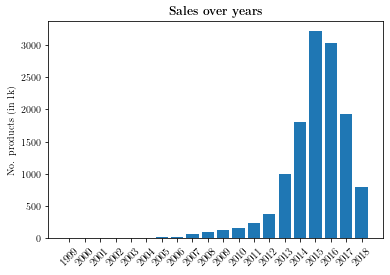

In [114]:
fig, ax = plt.subplots()

values = [x/100 for x in year_and_noProducts.values()]
ax.bar(year_and_noProducts.keys(), values)
#ax.bar(year_and_noProducts.keys(), year_and_noProducts.values() / 1000)

ax.set_ylabel('No. products (in 1k)')
ax.set_title('\\textbf{Sales over years}')
plt.xticks(fontsize=11, rotation=45)

plt.savefig('Sales.png')

## Categories

In [30]:

categories = df['category'].unique()

In [31]:
print(type(categories))
print(len(categories))

<class 'numpy.ndarray'>
10


In [32]:
categories

array(['Portable Audio & Video', 'Computers & Accessories', 'Headphones',
       'Camera & Photo', 'Television & Video', 'Home Audio',
       'Accessories & Supplies', 'Car Electronics & GPS',
       'Security & Surveillance', 'Wearable Technology'], dtype=object)

In [33]:
df.iloc[14]

item_id                             1
user_id                            14
rating                            4.0
timestamp         1999-10-17 00:00:00
model_attr                     Female
category      Computers & Accessories
brand                              HP
year                             2000
user_attr                         NaN
split                               0
Name: 14, dtype: object

### Sales in Year: Group by Categories

In [34]:
chosen_year = pd.to_datetime('2015').strftime('%Y')
categories_fraction = []
prod_in_category = dict()

for cat in categories:
    prod_in_category[cat] = 0

In [35]:
def is_product_in_category(prod, cat):
    return prod.category == cat

In [36]:
all_prod_in_chosen_year    =   df[df['timestamp'].apply(lambda x: prod_sold_in_year(chosen_year, x))]

In [37]:
no_prod_in_chosen_year      = len(all_prod_in_chosen_year)

In [38]:
for cat in categories:
    # print(cat)
    tmp                         =   df[df['category'] == cat]
    prod_in_category_in_year    =   pd.merge(all_prod_in_chosen_year, tmp)
    prod_in_category[cat]       =   len(prod_in_category_in_year)
    sizes = [round(prod_in_category[cat] / no_prod_in_chosen_year * 100) for cat in categories]
    if(sum(sizes) < 100):
        sizes[-1] = 100 - sum(sizes[:-1])
    assert(sum(sizes) == 100)
    

In [39]:
## Every category whose fraction is under 10% is groupped together 
category_sizes  = dict()
for i, cat in enumerate(categories):
    category_sizes[cat] = sizes[i]
    
category_sizes['Others'] = 0
for cat in categories:
    if (category_sizes[cat] < 10):
        category_sizes['Others'] += category_sizes[cat]
        category_sizes.pop(cat)

#### Plot

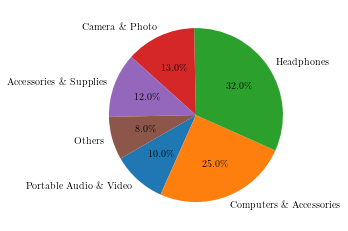

In [40]:
labels = category_sizes.keys()

# escape & in labels
new_labels = []
for label in labels:
    if '&' in label:
        new_labels.append(label.replace('&', '\&'))
    else:
        new_labels.append(label)

sizes = category_sizes.values()

fig, ax = plt.subplots()
ax.pie(sizes, labels=new_labels, autopct='%1.1f\%%', startangle=210)

plt.savefig('PieChart.pdf')

#### Plot: Show Ratings in Category 'Headphones'

In [41]:
max_fraction = max(category_sizes.values())
myexplode = []

for k,v in category_sizes.items():
    if (v == max_fraction):
        myexplode.append(0.05)
    else:
        myexplode.append(0.0)

In [42]:
headphones_prod_in_chosen_year = all_prod_in_chosen_year[all_prod_in_chosen_year['category'] == 'Headphones']

headphones_rating = np.sort(headphones_prod_in_chosen_year.rating.unique())
rating_ratios = dict()
for r in headphones_rating:
    rating_ratios[r] = .0

for r in rating_ratios.keys():
    tmp = headphones_prod_in_chosen_year[headphones_prod_in_chosen_year['rating'].apply(lambda x: x == r)]
    rating_ratios[r] = len(tmp) / len(headphones_prod_in_chosen_year)


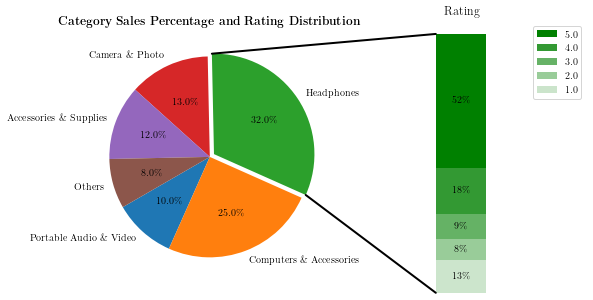

In [113]:
from matplotlib.patches import ConnectionPatch

# bar chart parameters
rating_ratios_plot = rating_ratios.values()
rating_labels_plot = rating_ratios.keys()
bottom = 1
width = .2

labels = category_sizes.keys()

# escape & in labels
new_labels = []
for label in labels:
    if '&' in label:
        new_labels.append(label.replace('&', '\&'))
    else:
        new_labels.append(label)

sizes = category_sizes.values()

# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
fig.subplots_adjust(wspace=0)

wedges, *_ = ax1.pie(sizes, labels=new_labels, autopct='%1.1f\%%', startangle=210, explode = myexplode)

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(rating_ratios_plot, rating_labels_plot)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='green', label=label, alpha= 1 - (0.2 * j))
    ax2.bar_label(bc, labels=[f"{height*100:.0f}\%"], label_type='center')

ax2.set_title('Rating')
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[2].theta1, wedges[2].theta2
center, r = wedges[2].center, wedges[2].r
bar_height = sum(rating_ratios_plot)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(2)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(2)

ax1.set_title("\\textbf{Category Sales Percentage and Rating Distribution}")
plt.savefig('PieChart_exploded.png')

## User IDs

In [44]:

user_ids = df['user_id'].unique()

In [45]:
print(len(user_ids))

1157633


In [46]:
user_ids

array([      0,       1,       2, ..., 1157630, 1157631, 1157632])

### Insights
The list of UserIDs is consecutively numbered starting from 0 and ending at `len(user_ids) - 1`. This means each UserID is a unique integer incremented by 1 for each subsequent user.

### **Question:** Find Top-10 users that buy the most in each category

In [47]:
categories

array(['Portable Audio & Video', 'Computers & Accessories', 'Headphones',
       'Camera & Photo', 'Television & Video', 'Home Audio',
       'Accessories & Supplies', 'Car Electronics & GPS',
       'Security & Surveillance', 'Wearable Technology'], dtype=object)

In [48]:
import heapq

In [83]:
def find_userID_for_top_products_sold(uid_and_noProdsBought, top_ten_number_of_prods_bought):
    """Given a list of number of top-ten products sold, find corresponding userIDs

    Args:
        uid_and_noProdsBought          (dict): a dictionary of (userID, number of products bought by this userID)
        top_ten_number_of_prods_bought (list): a list of top-10 products sold

    Returns:
        dict: a dictionary of (num_products_sold, list of userIDs)
    """
    numProducts_uid = {i:[] for i in top_ten_number_of_prods_bought}

    for i in top_ten_number_of_prods_bought:
        num_appearance = top_ten_number_of_prods_bought.count(i)
        uid = list(uid_and_noProdsBought.keys())[list(uid_and_noProdsBought.values()).index(i)]
        if num_appearance > 1:
            uid_and_noProdsBought.pop(uid)
        numProducts_uid[i].append(uid)
    return numProducts_uid

In [92]:
top_ten = []
for cat in categories:
    prod_bought_in_a_category = df[df['category'] == cat]
    # print(prod_bought_in_a_category)
    prod_bought_in_a_category_groupByUserID = prod_bought_in_a_category.groupby('user_id')

    uid_and_noProdsBought = dict()
    for uid in prod_bought_in_a_category_groupByUserID.groups.keys():
        uid_and_noProdsBought[uid] = len(prod_bought_in_a_category_groupByUserID.get_group(uid))

    top_ten_number_of_prods_bought = heapq.nlargest(10, uid_and_noProdsBought.values())
    result = find_userID_for_top_products_sold(uid_and_noProdsBought, top_ten_number_of_prods_bought)
    print(f'Category = {cat}')
    for k,v in result.items():
        print(f'\tNumber of products = {k:>4} \t UserIDs: {v}')

Category = Portable Audio & Video
	Number of products =   11 	 UserIDs: [18111]
	Number of products =   10 	 UserIDs: [3939, 28782, 39772]
	Number of products =    9 	 UserIDs: [46878]
	Number of products =    8 	 UserIDs: [28777, 73163, 80476]
	Number of products =    7 	 UserIDs: [16528, 18202]
Category = Computers & Accessories
	Number of products =   13 	 UserIDs: [24045]
	Number of products =   11 	 UserIDs: [8200, 8629, 27769, 30677, 80476]
	Number of products =    9 	 UserIDs: [18111, 18193, 22606, 37749]
Category = Headphones
	Number of products =   21 	 UserIDs: [142967]
	Number of products =   19 	 UserIDs: [30661]
	Number of products =   17 	 UserIDs: [179602, 247264]
	Number of products =   16 	 UserIDs: [165869]
	Number of products =   14 	 UserIDs: [3054, 89185]
	Number of products =   12 	 UserIDs: [16528, 37749]
	Number of products =   11 	 UserIDs: [3939]
Category = Camera & Photo
	Number of products =   16 	 UserIDs: [7605]
	Number of products =   12 	 UserIDs: [11581

### Insights

In every category, multiple users can buy the same number of products. The utility function `find_userID_for_top_products_sold` accounts for this and returns a dictionary mapping the number of products sold to lists of user IDs who bought that number of products

## Brands

In [93]:
brands = df[~df['brand'].isna()]['brand'].unique()

In [94]:
brands

array(['HP', 'Philips', 'Polaroid', 'Panasonic', 'JVC', 'Fujifilm',
       'Nikon', 'Kodak', 'Sony', 'Canon', 'Kensington', 'Pyle', 'Olympus',
       'Toshiba', 'Logitech', 'Etre Jeune', 'Linksys', 'Vivitar',
       'Sennheiser', 'Apple', 'Samsung', 'EldHus', 'Bose', 'Archos',
       'Garmin', 'Jabra', 'Gary Fong', 'ViewSonic', 'Savage', 'Uniden',
       'ebasy', 'Generic', 'JLAB', 'Skullcandy', 'TaoTronics', 'Neewer',
       'Koolertron', 'DURAGADGET', 'iRULU', 'Tiamat', 'DBPOWER', 'Fintie',
       'Plemo', 'EINCAR', 'Cooper Cases', 'LSS', 'Mpow', 'XShields',
       'IRULU', 'Funlux'], dtype=object)

In [95]:
print(len(brands))

50


## Brands - Categories

In [96]:
brands_categories = df[['brand', 'category']]

In [97]:
brands_categories = brands_categories[~brands_categories['brand'].isna()]

In [98]:
brands_categories

,brand,category
14,HP,Computers & Accessories
42,HP,Computers & Accessories
75,HP,Computers & Accessories
76,HP,Computers & Accessories
77,HP,Computers & Accessories
...,...,...
1292934,ebasy,Computers & Accessories
1292942,ebasy,Computers & Accessories
1292945,ebasy,Computers & Accessories
1292949,Etre Jeune,Headphones


### **Question:** which categories a brand's products belong to?

In [99]:
brand = 'HP'

In [100]:
categories_OI = brands_categories[brands_categories['brand']==brand]

In [101]:
categories_OI

,brand,category
14,HP,Computers & Accessories
42,HP,Computers & Accessories
75,HP,Computers & Accessories
76,HP,Computers & Accessories
77,HP,Computers & Accessories
...,...,...
1291578,HP,Computers & Accessories
1291700,HP,Computers & Accessories
1291769,HP,Computers & Accessories
1291787,HP,Computers & Accessories


In [102]:
active_categories = categories_OI['category'].unique()

In [103]:
active_categories

array(['Computers & Accessories', 'Camera & Photo'], dtype=object)

### Brand-Category Correspondence

In [104]:
for brand in brands:
    categories_OI = brands_categories[brands_categories['brand']==brand]
    active_categories = categories_OI['category'].unique()
    print('{:>20} active in Category: '.format(brand), end='')
    [print('{:<15}, '.format(cat), end='') for cat in active_categories]
    print('\n')

                  HP active in Category: Computers & Accessories, Camera & Photo , 

             Philips active in Category: Television & Video, Home Audio     , Headphones     , Camera & Photo , Portable Audio & Video, Accessories & Supplies, Computers & Accessories, 

            Polaroid active in Category: Camera & Photo , Television & Video, Accessories & Supplies, Headphones     , Computers & Accessories, Portable Audio & Video, 

           Panasonic active in Category: Camera & Photo , Television & Video, Headphones     , Car Electronics & GPS, Portable Audio & Video, 

                 JVC active in Category: Camera & Photo , Car Electronics & GPS, Television & Video, Accessories & Supplies, Headphones     , 

            Fujifilm active in Category: Camera & Photo , Computers & Accessories, 

               Nikon active in Category: Camera & Photo , 

               Kodak active in Category: Camera & Photo , Computers & Accessories, 

                Sony active in Category:

### **Question:** which category has the highest market competition?

In [105]:
categories

array(['Portable Audio & Video', 'Computers & Accessories', 'Headphones',
       'Camera & Photo', 'Television & Video', 'Home Audio',
       'Accessories & Supplies', 'Car Electronics & GPS',
       'Security & Surveillance', 'Wearable Technology'], dtype=object)

In [106]:
# Count brands in each category
max_no_brands = 0
cat_OI = ''
for cat in categories:
    print('Category: {:<20}'.format(cat))
    brands_OI = brands_categories[brands_categories['category']==cat]['brand'].unique()


    print(f'\t\t Num brands: {len(brands_OI)}')

    if (len(brands_OI)>max_no_brands):
        max_no_brands = len(brands_OI)    
        cat_OI = cat

In [108]:
print(f'{cat_OI} is the category with highest no. of brands = {max_no_brands}')

Computers & Accessories is the category with highest no. of brands = 33
